# Simple linear regression

The objective of this notebook is to create a simple model called 'Simple linear regression model'.
We have a database about cars and we will try to predict the CO2 Emissions base on one feature about cars.
Of course, we now to analyze what is the most important feature in a car that impact in the CO2 emissions.

In [1]:
#Importin libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

In [5]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

# Data exploration

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
# We are focus in four variables
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


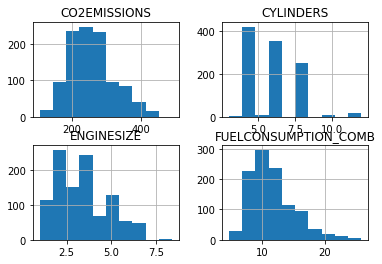

In [8]:
cdf[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']].hist()
plt.show()

In [9]:
df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


### We analyze the relation between CO2 emission and other variables plotting scatters using seaborn

Text(0.5, 1.0, 'Enginesize vs CO2 Emissions')

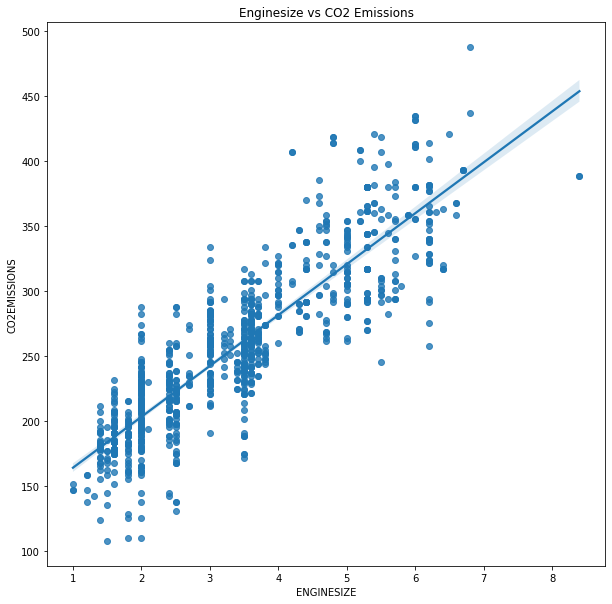

In [16]:
plt.figure(figsize=(10, 10))
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.title('Enginesize vs CO2 Emissions')

Text(0.5, 1.0, 'Numbers of cylinders vs CO2 Emissions')

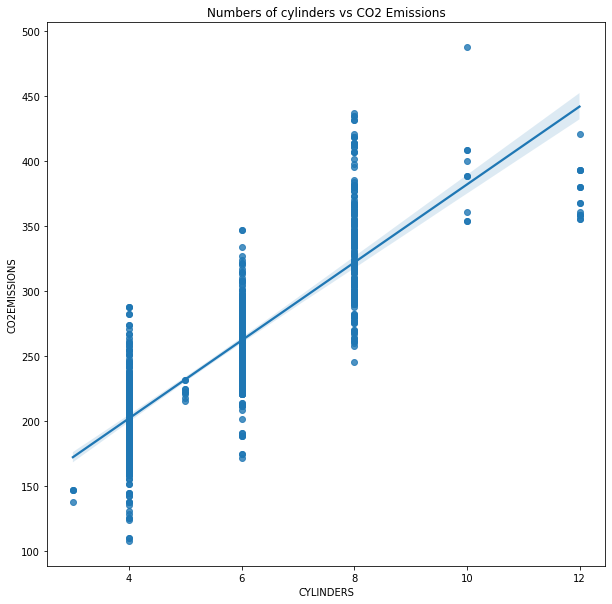

In [19]:
plt.figure(figsize=(10, 10))
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', data=df)
plt.title('Numbers of cylinders vs CO2 Emissions')

Text(0.5, 1.0, 'Fuel consumption vs CO2 Emissions')

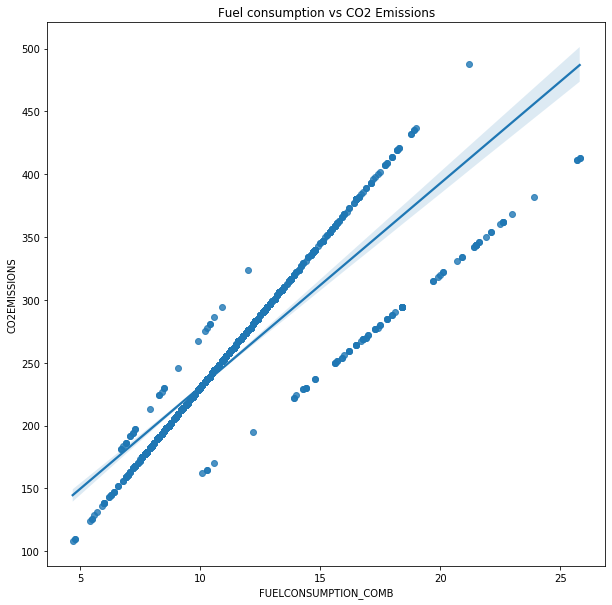

In [20]:
plt.figure(figsize=(10, 10))
sns.regplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df)
plt.title('Fuel consumption vs CO2 Emissions')

## Train/Test Split

In [21]:
x_data = cdf.drop('CO2EMISSIONS', axis=1)
y_data = cdf['CO2EMISSIONS']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 853


## The model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train[['ENGINESIZE']], y_train)
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [39.4153746]
Intercept:  124.77059523158385


## Evaluation

In [26]:
#R^2
lr.score(x_test[['ENGINESIZE']], y_test) 

0.7644809223805962

In [27]:
Yhat = lr.predict(cdf[['ENGINESIZE']])

In [28]:
from sklearn.metrics import mean_squared_error 

In [29]:
#Mean squared error
mse = mean_squared_error(cdf['CO2EMISSIONS'], Yhat)
print(mse)

946.6741105469348


# Conclusion

In this model we analyzed a model to explain the CO2 emissions based in just one feature. In our case, we analyzed the engine size was the most important feature to explain the CO2 emissions.
Then we made an out of sample evaluation and calculated the R^2 and the mean squared error.
We will improve our model in the next labs.